# Machine Learning 2 - Advanced Regression Assignment

## Case Study - Housing Price Prediction

### By - Ankur Dhuriya

__This assignment is a programming assignment wherein you are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.__

## Business Goal

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

## Steps for Achieve the Business Goal

- __Step 1: Reading the Data__
- __Step 2: Data Quality, Duplicate Check and Cleansing__
- __Step 3: Adding Feature Columns__
- __Step 4: Converting Feature Values Into Categorical Values__
- __Step 5: Understanding the Data by Visualizing__
- __Step 6: Data Preparation__
- __Step 7: Splitting the Data into Training, Testing Sets and Scaling__
- __Step 8: Feature Selection__
- __Step 9: Model Building (Linear, Ridge and Lasso Regression)__
- __Step 10: Conclusion - Top 10 Feature Variable Affecting the House Price__

## Solution

## Step 1: Reading the Data

In [1]:
# Suppress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import numpy and pandas libraries for data processing
import numpy as np
import pandas as pd

In [3]:
# Configuring pandas to display all rows and columns
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [4]:
# Loading the given train.csv dataset
housing_data = pd.read_csv("train.csv")

In [5]:
# Analyzing the shape of the data 
housing_data.shape

(1460, 81)

As per the above result, the dataset contains,<br>
__Rows__ : __1460__ <br>
__Columns__ : __81__

In [6]:
# Printing the head of the dataset to analyze the values 
housing_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
# Printing overall statistics of the dataset (of numerical variables)
housing_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Step 2: Data Quality, Duplicate Check and Cleansing

In [8]:
# Printing the dataset column wise info for analysis
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Now we need to analyze each of the above columns and conclude how we will process the missing records, either impute or delete the respective row. To fully understand the missing records, the percentage of missing records must be determined.

In [9]:
# calculating the percentage of missing records 
housing_data[housing_data.columns[housing_data.isnull().any()]].isnull().sum() * 100 / housing_data.shape[0]

LotFrontage     17.739726
Alley           93.767123
MasVnrType      59.726027
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

Based on the above analysis, we can observe that following columns have the highest percentage of missing values.
- __Alley__           
- __FireplaceQu__     
- __PoolQC__          
- __Fence__           
- __MiscFeature__

After reviewing the data dictionary for the above columns, it's clear that Pandas has interpreted 'NA' as a missing value which having a concrete definition in the data dictionary for respective fields.

After reviewing the data dictionary, especially for all columns with missing values, determined that the value 'NA' is incorrectly interpreted by the Pandas library as a missing value (NaN).
- __Alley__
- __BsmtQual__
- __BsmtCond__
- __BsmtExposure__
- __BsmtFinType1__
- __BsmtFinType2__
- __FireplaceQu__
- __GarageType__
- __GarageFinish__
- __GarageQual__
- __GarageCond__
- __PoolQC__
- __Fence__
- __MiscFeature__

To fix this issue, we need to impute the correct value for each of the above columns

In [10]:
# Re Loading the train.csv dataset by mitigating NA to be misinterpreted as NaN
housing_data = pd.read_csv("train.csv", keep_default_na=False)

#### Imputing 'None' as 'NA' Value for Alley Coulmn

In [11]:
housing_data[['Alley']] = housing_data[['Alley']].replace('NA', 'None')

#### Imputing 'None' as 'NA' Value for BsmtQual Coulmn

In [12]:
housing_data[['BsmtQual']] = housing_data[['BsmtQual']].replace('NA', 'None')

#### Imputing 'None' as 'NA' Value for BsmtCond Coulmn

In [13]:
housing_data[['BsmtCond']] = housing_data[['BsmtCond']].replace('NA', 'None')

#### Imputing 'None' as 'NA' Value for BsmtExposure Coulmn

In [14]:
housing_data[['BsmtExposure']] = housing_data[['BsmtExposure']].replace('NA', 'None')

#### Imputing 'None' as 'NA' Value for BsmtFinType1 Coulmn

In [15]:
housing_data[['BsmtFinType1']] = housing_data[['BsmtFinType1']].replace('NA', 'None')

#### Imputing 'None' as 'NA' Value for BsmtFinType2 Coulmn

In [16]:
housing_data[['BsmtFinType2']] = housing_data[['BsmtFinType2']].replace('NA', 'None')

#### Imputing 'None' as 'NA' Value for FireplaceQu Coulmn

In [17]:
housing_data[['FireplaceQu']] = housing_data[['FireplaceQu']].replace('NA', 'None')

#### Imputing 'None' as 'NA' Value for GarageType Coulmn

In [18]:
housing_data[['GarageType']] = housing_data[['GarageType']].replace('NA', 'None')

#### Imputing 'None' as 'NA' Value for GarageFinish Coulmn

In [19]:
housing_data[['GarageFinish']] = housing_data[['GarageFinish']].replace('NA', 'None')

#### Imputing 'None' as 'NA' Value for GarageQual Coulmn

In [20]:
housing_data[['GarageQual']] = housing_data[['GarageQual']].replace('NA', 'None')

#### Imputing 'None' as 'NA' Value for GarageCond Coulmn

In [21]:
housing_data[['GarageCond']] = housing_data[['GarageCond']].replace('NA', 'None')

#### Imputing 'None' as 'NA' Value for PoolQC Coulmn

In [22]:
housing_data[['PoolQC']] = housing_data[['PoolQC']].replace('NA', 'None')

#### Imputing 'None' as 'NA' Value for Fence Coulmn

In [23]:
housing_data[['Fence']] = housing_data[['Fence']].replace('NA', 'None')

#### Imputing 'None' as 'NA' Value for MiscFeature Coulmn

In [24]:
housing_data[['MiscFeature']] = housing_data[['MiscFeature']].replace('NA', 'None')

#### Converting MSSubClass in to Object Type 

Because MSSubClass contains label place holders for its definition, the column doesn't have any numerical value to it, thereby we need to convert it from __int64__ to __Object__ type.

In [25]:
housing_data[['MSSubClass']] = housing_data[['MSSubClass']].astype(object)

In [26]:
# Printing the dataset column wise info for analysis after fixing the misinterpretation
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   object
 2   MSZoning       1460 non-null   object
 3   LotFrontage    1460 non-null   object
 4   LotArea        1460 non-null   int64 
 5   Street         1460 non-null   object
 6   Alley          1460 non-null   object
 7   LotShape       1460 non-null   object
 8   LandContour    1460 non-null   object
 9   Utilities      1460 non-null   object
 10  LotConfig      1460 non-null   object
 11  LandSlope      1460 non-null   object
 12  Neighborhood   1460 non-null   object
 13  Condition1     1460 non-null   object
 14  Condition2     1460 non-null   object
 15  BldgType       1460 non-null   object
 16  HouseStyle     1460 non-null   object
 17  OverallQual    1460 non-null   int64 
 18  OverallCond    1460 non-null

In [27]:
# Printing data head of processed data frame
housing_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000


#### Addressing Missing LotFrontage Records

In [28]:
# Retrieving missing LotFrontage records count
housing_data[housing_data['LotFrontage'] =='NA'].shape[0] 

259

There're 259 records with missing LotFrontage value, the record count is nearly 18% of the entire dataset, removing all of these records will create a negative impact on the analysis. While analysing the data dictionary LotFrontage doesn't have a much importance towards determining the house values, __hence decided to remove the LotFrontage column from the dataset__

In [29]:
housing_data = housing_data.drop(['LotFrontage'], axis=1)

#### Addressing Missing MasVnrType Records

In [30]:
# Retrieving missing MasVnrType records count
housing_data[housing_data['MasVnrType'] =='NA'].shape[0] 

8

There're 8 records with missing MasVnrType value, __hence decided to remove the rows for missing MasVnrType value__

In [31]:
# Removing rows which having missing values for MasVnrType 
housing_data = housing_data[housing_data['MasVnrType'] !='NA']

#### Addressing Missing Electrical Records

In [32]:
# Getting missing MasVnrArea records count
housing_data[housing_data['Electrical'] =='NA'].shape[0] 

1

There're 1 records with missing Electrical value, __hence decided to remove the rows for missing Electrical value__

#### Addressing Missing GarageYrBlt Records

In [33]:
# Getting missing MasVnrArea records count
housing_data[housing_data['GarageYrBlt'] =='NA'].shape[0] 

81

There're 81 records with missing GarageYrBlt value, which is nearly 5% of the entire dataset, removing all these records cause a negative impact on the analysis due to given dataset is considerably smaller. While analysing the dataset we found that __GarageYrBlt__ (Year garage was built) value is similar to __YearBuilt__ (Original construction date) in most cases. __Hence decided imputing the YearBuilt value to missing GarageYrBlt value__ 

In [34]:
# Replacing missing GarageYrBlt values with YearBuilt
housing_data['GarageYrBlt'] = housing_data['GarageYrBlt'].replace('NA', np.NaN)
housing_data['GarageYrBlt'].fillna(housing_data['YearBuilt'], inplace=True)

In [35]:
# After removing inconsistent records checking the shape of the dataset
housing_data.shape

(1452, 80)

After data cleaning, the dataset contains,<br>
__Rows__ : __1452__ <br>
__Columns__ : __80__

## Step 3: Adding Feature Columns

When we examine the data dictionary we can observe that we can extract the __Age__ of the house while selling it using __YrSold__ and __YearBuilt__ properties, it will be a good candidate for a feature coulmn

In [36]:
housing_data['AgeOnSelling'] = housing_data['YrSold'] - housing_data['YearBuilt']

In [37]:
housing_data.head()

,Id,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,AgeOnSelling
0,1,60,RL,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500,5
1,2,20,RL,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500,31
2,3,60,RL,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500,7
3,4,70,RL,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000,91
4,5,60,RL,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000,8


In [38]:
# After adding the AgeOnSelling column checking the shape of the data
housing_data.shape

(1452, 81)

After data cleaning, the dataset contains,<br>
__Rows__ : __1452__ <br>
__Columns__ : __81__

## Step 4: Converting Feature Values Into Categorical Values

When we observe the data dictionary, we found that there are few Feature values needed to convert into Categorical values, following Feature Variables needed to be transformed into Categorical values.

- MSSubClass
- OverallQual
- OverallCond

#### Transforming MSSubClass into Categorical Value

In [39]:
# Creating the map function for MSSubClass
def mssubclass_map(x):
    return x.map({20:'1-STORY 1946 & NEWER ALL STYLES', 30:'1-STORY 1945 & OLDER', 
                  40:'1-STORY W/FINISHED ATTIC ALL AGES', 45:'1-1/2 STORY - UNFINISHED ALL AGES',
                  50:'1/2 STORY FINISHED ALL AGES', 60:'2-STORY 1946 & NEWER',
                  70:'2-STORY 1945 & OLDER', 75:'2-1/2 STORY ALL AGES',
                  80:'SPLIT OR MULTI-LEVEL', 85:'SPLIT FOYER',
                  90:'DUPLEX - ALL STYLES AND AGES', 120:'1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
                  150:'1-1/2 STORY PUD - ALL AGESS', 160:'2-STORY PUD - 1946 & NEWER',
                  180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER', 190:'2 FAMILY CONVERSION - ALL STYLES AND AGES'})

In [40]:
# Applying the mssubclass_map for MSSubClass column
housing_data[['MSSubClass']]=housing_data[['MSSubClass']].apply(mssubclass_map)

#### Transforming OverallQual and OverallCond into Categorical Value

In [41]:
def rate_map(x):
     return x.map({1:'Very Poor', 2:'Poor', 3:'Fair', 4:'Below Average', 5:'Average', 6:'Above Average', 7:'Good', 
                   8:'Very Good', 9:'Excellent', 10:'Very Excellent'})


In [42]:
# Applying the rate_map for OverallQual column
housing_data[['OverallQual']]=housing_data[['OverallQual']].apply(rate_map)

In [43]:
# Applying the rate_map for OverallCond column
housing_data[['OverallCond']]=housing_data[['OverallCond']].apply(rate_map)

In [44]:
# Printing data head of processed data frame
housing_data.head()

,Id,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,AgeOnSelling
0,1,2-STORY 1946 & NEWER,RL,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Good,Average,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500,5
1,2,1-STORY 1946 & NEWER ALL STYLES,RL,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Above Average,Very Good,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500,31
2,3,2-STORY 1946 & NEWER,RL,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Good,Average,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500,7
3,4,2-STORY 1945 & OLDER,RL,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Good,Average,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000,91
4,5,2-STORY 1946 & NEWER,RL,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Very Good,Average,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000,8


## Step 5: Understanding the Data by Visualizing

After completion of data cleansing and transforming, we should understand the dataset further for the existence of any __corrections__ and __multicollinearity__, to perform identification of __correlations__ and __multicollinearity__, we use standard data visualizing techniques.

In [45]:
# Importing matplotlib and seaborn libraries for data visualization 
import matplotlib.pyplot as plt
import seaborn as sns

#### Visualizing Numeric Variables

To visualize numeric variables, we can use a scatter plot, due to we have multiple numeric variables, we can create a pairplot for visualizing all the numerical data points in a single figure.

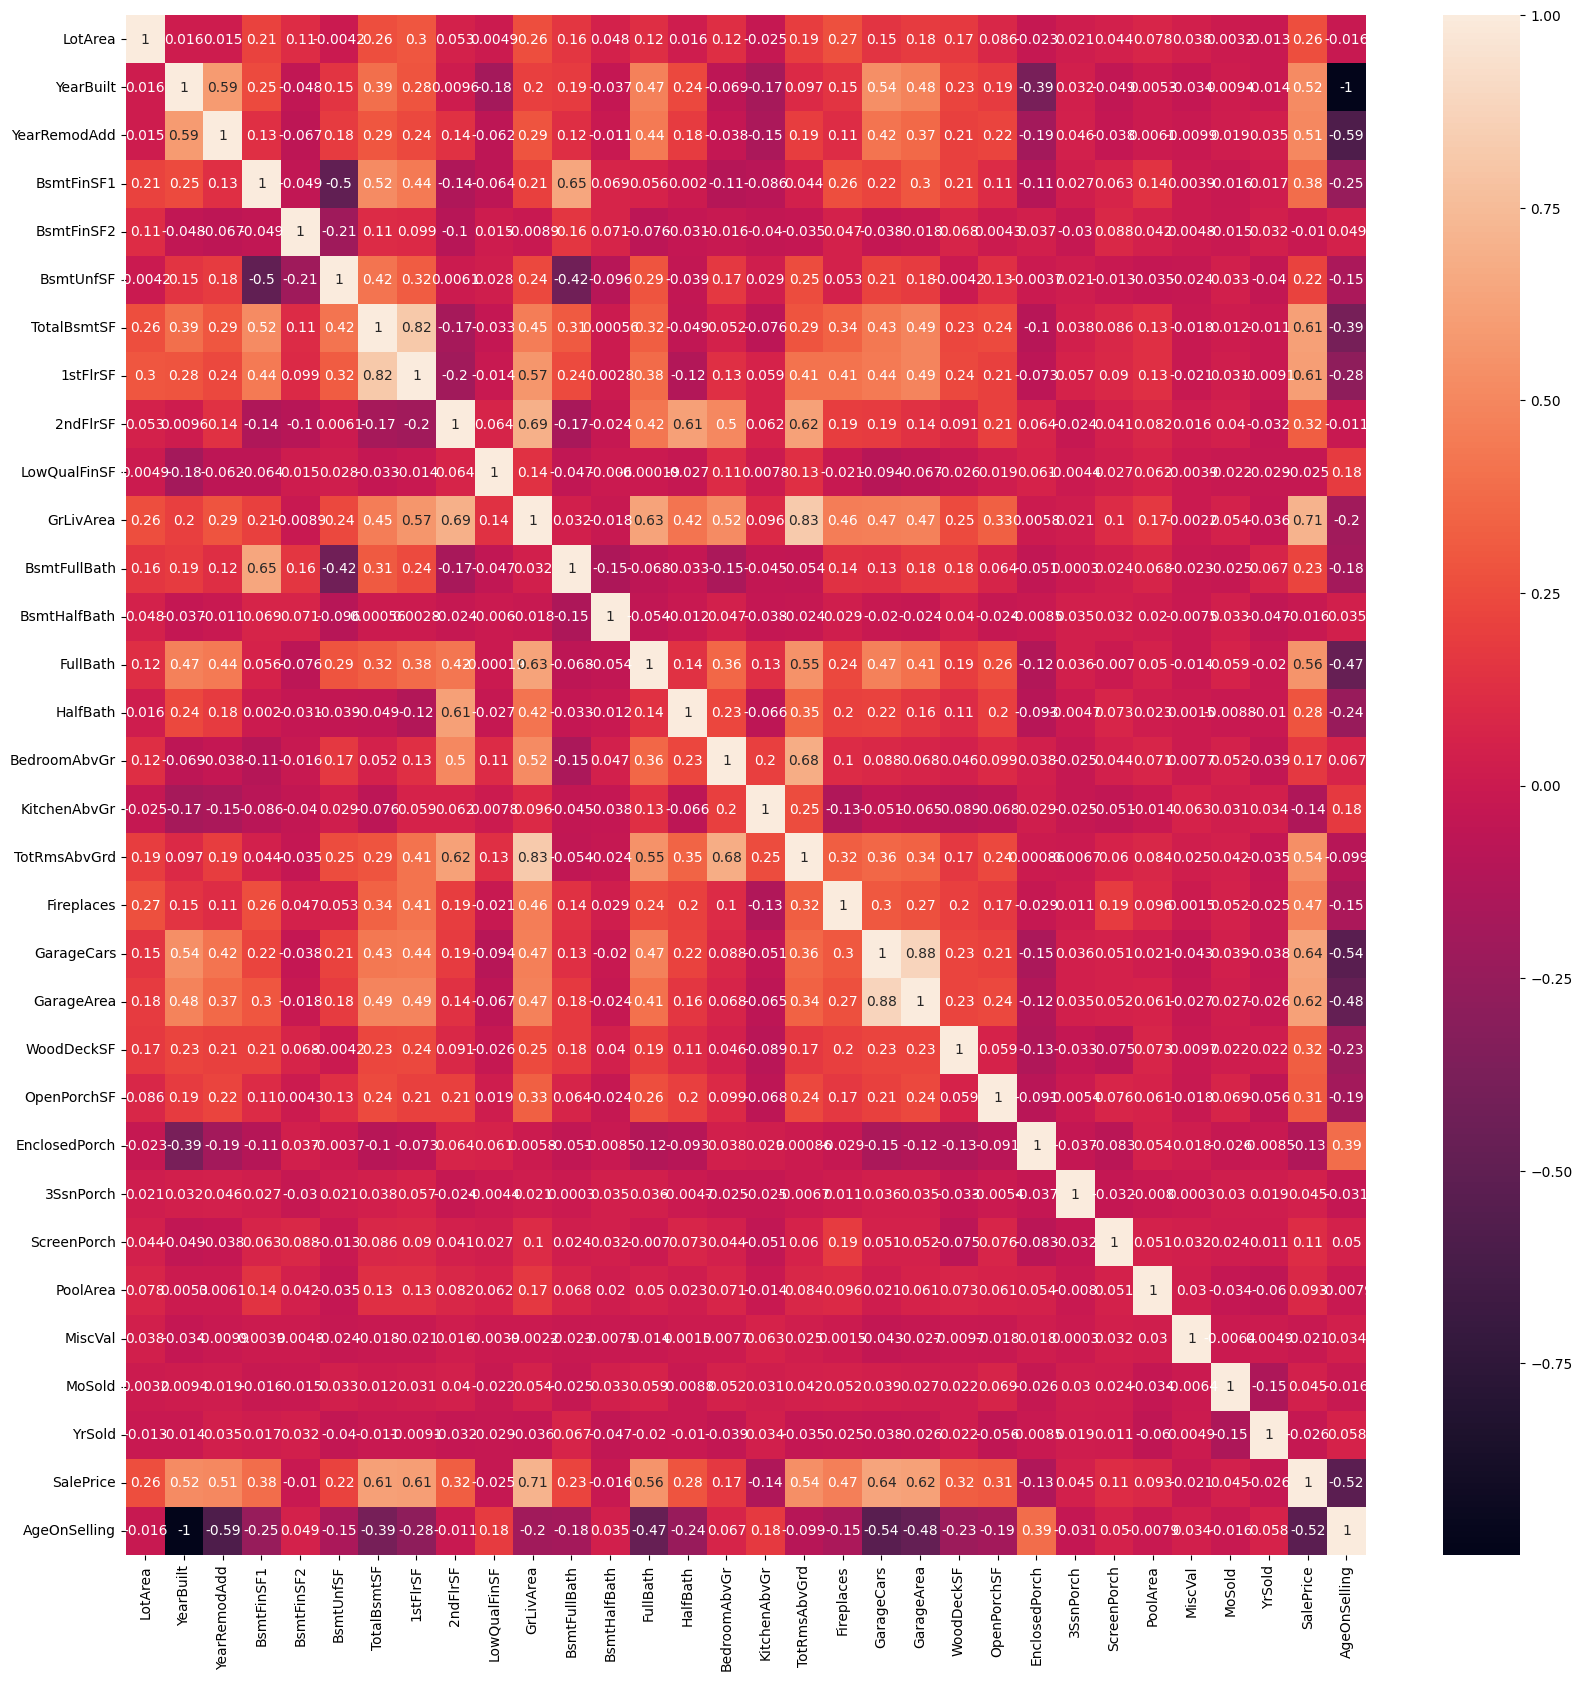

In [46]:
# Creating a scatter plot for the housing dataset 
numeric_column_index_list = list(housing_data.dtypes[housing_data.dtypes!=object].index)
plt.figure(figsize=(20,20))
sns.heatmap(housing_data[numeric_column_index_list].drop(['Id'],axis=1).corr(),annot=True)
plt.show()

According to the above heat map, we can extract valuable information on the correlation between Dependent and Independent variables, the Sale Price has a considerable correlation between following Dependent Variables,

- __YearBuilt__
- __YearRemodAdd__
- __TotalBsmtSF__
- __1stFlrSF__
- __GrLivArea__
- __FullBath__
- __TotRmsAbvGrd__
- __GarageCars__
- __GarageArea__
- __EnclosedPorch__
- __AgeOnSelling (Negative Correlation)__

To visualize the above corrections we can create a pairplot.

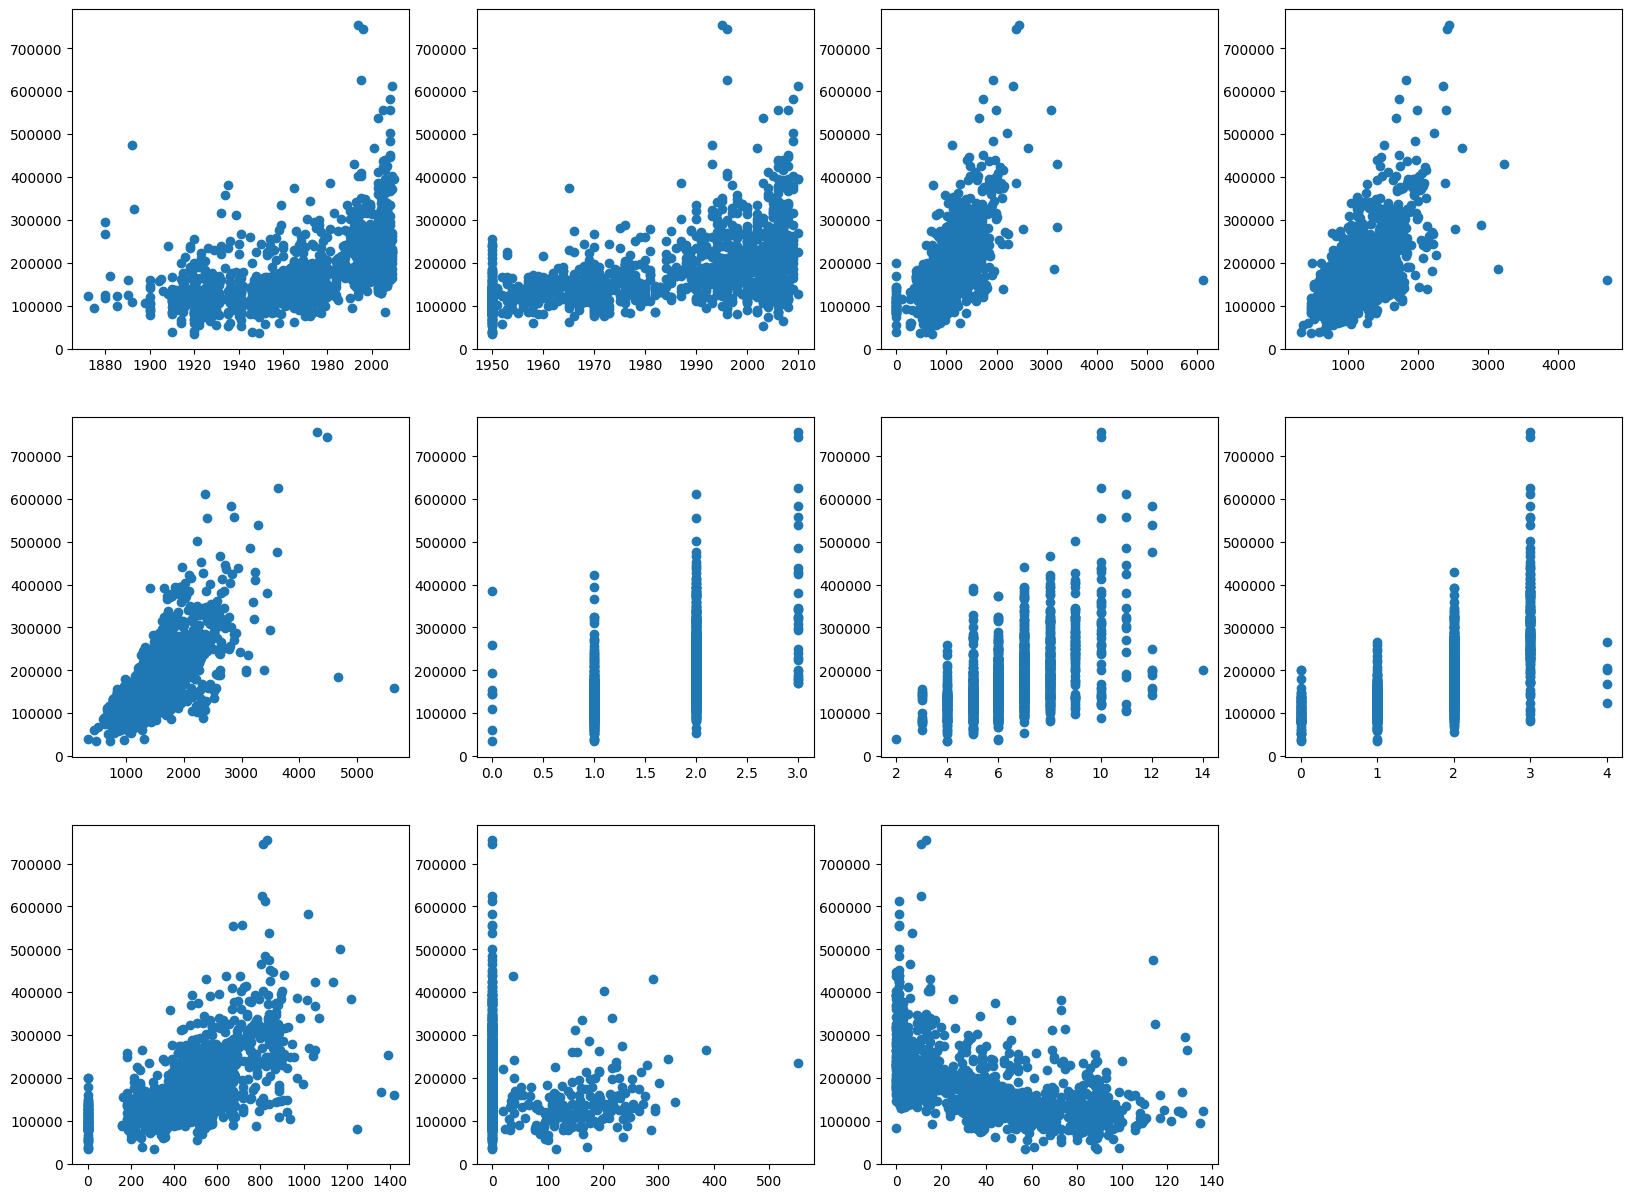

In [47]:
plt.figure(figsize=(20,15))
plt.subplot(3,4,1)
plt.scatter(housing_data['YearBuilt'],housing_data['SalePrice'])
plt.subplot(3,4,2)
plt.scatter(housing_data['YearRemodAdd'],housing_data['SalePrice'])
plt.subplot(3,4,3)
plt.scatter(housing_data['TotalBsmtSF'],housing_data['SalePrice'])
plt.subplot(3,4,4)
plt.scatter(housing_data['1stFlrSF'],housing_data['SalePrice'])
plt.subplot(3,4,5)
plt.scatter(housing_data['GrLivArea'],housing_data['SalePrice'])
plt.subplot(3,4,6)
plt.scatter(housing_data['FullBath'],housing_data['SalePrice'])
plt.subplot(3,4,7)
plt.scatter(housing_data['TotRmsAbvGrd'],housing_data['SalePrice'])
plt.subplot(3,4,8)
plt.scatter(housing_data['GarageCars'],housing_data['SalePrice'])
plt.subplot(3,4,9)
plt.scatter(housing_data['GarageArea'],housing_data['SalePrice'])
plt.subplot(3,4,10)
plt.scatter(housing_data['EnclosedPorch'],housing_data['SalePrice'])
plt.subplot(3,4,11)
plt.scatter(housing_data['AgeOnSelling'],housing_data['SalePrice'])

According to the heatmap we can identify that there're __multicollinearity__ exists between following variable pairs,

- __TotalBsmtSF__ and __1stFlrSF__
- __GarageArea__ and __GarageCars__

Due to the existence of __multicollinearity__ among above pairs, concluded to remove __1stFlrSF__ and __GarageCars__ columns 

In [48]:
# dropping 1stFlrSF column
housing_data = housing_data.drop('1stFlrSF', axis=1)

In [49]:
# dropping GarageCars column
housing_data = housing_data.drop('GarageCars', axis=1)

In [50]:
# After dropping the 1stFlrSF and GarageCars columns checking the shape of the data
housing_data.shape

(1452, 79)

After data cleaning, the dataset contains,<br>
__Rows__ : __1452__ <br>
__Columns__ : __79__

In [51]:
# Printing data head of processed data frame
housing_data.head()

,Id,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,AgeOnSelling
0,1,2-STORY 1946 & NEWER,RL,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Good,Average,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003,RFn,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500,5
1,2,1-STORY 1946 & NEWER ALL STYLES,RL,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Above Average,Very Good,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500,31
2,3,2-STORY 1946 & NEWER,RL,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Good,Average,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500,7
3,4,2-STORY 1945 & OLDER,RL,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Good,Average,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000,91
4,5,2-STORY 1946 & NEWER,RL,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Very Good,Average,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000,8


#### Identifying Outliers And Rectifying

Identifying outliers is an important process of data cleansing, we will use boxplots to visualize the outliers.

Text(0.5, 0, 'AgeOnSelling')

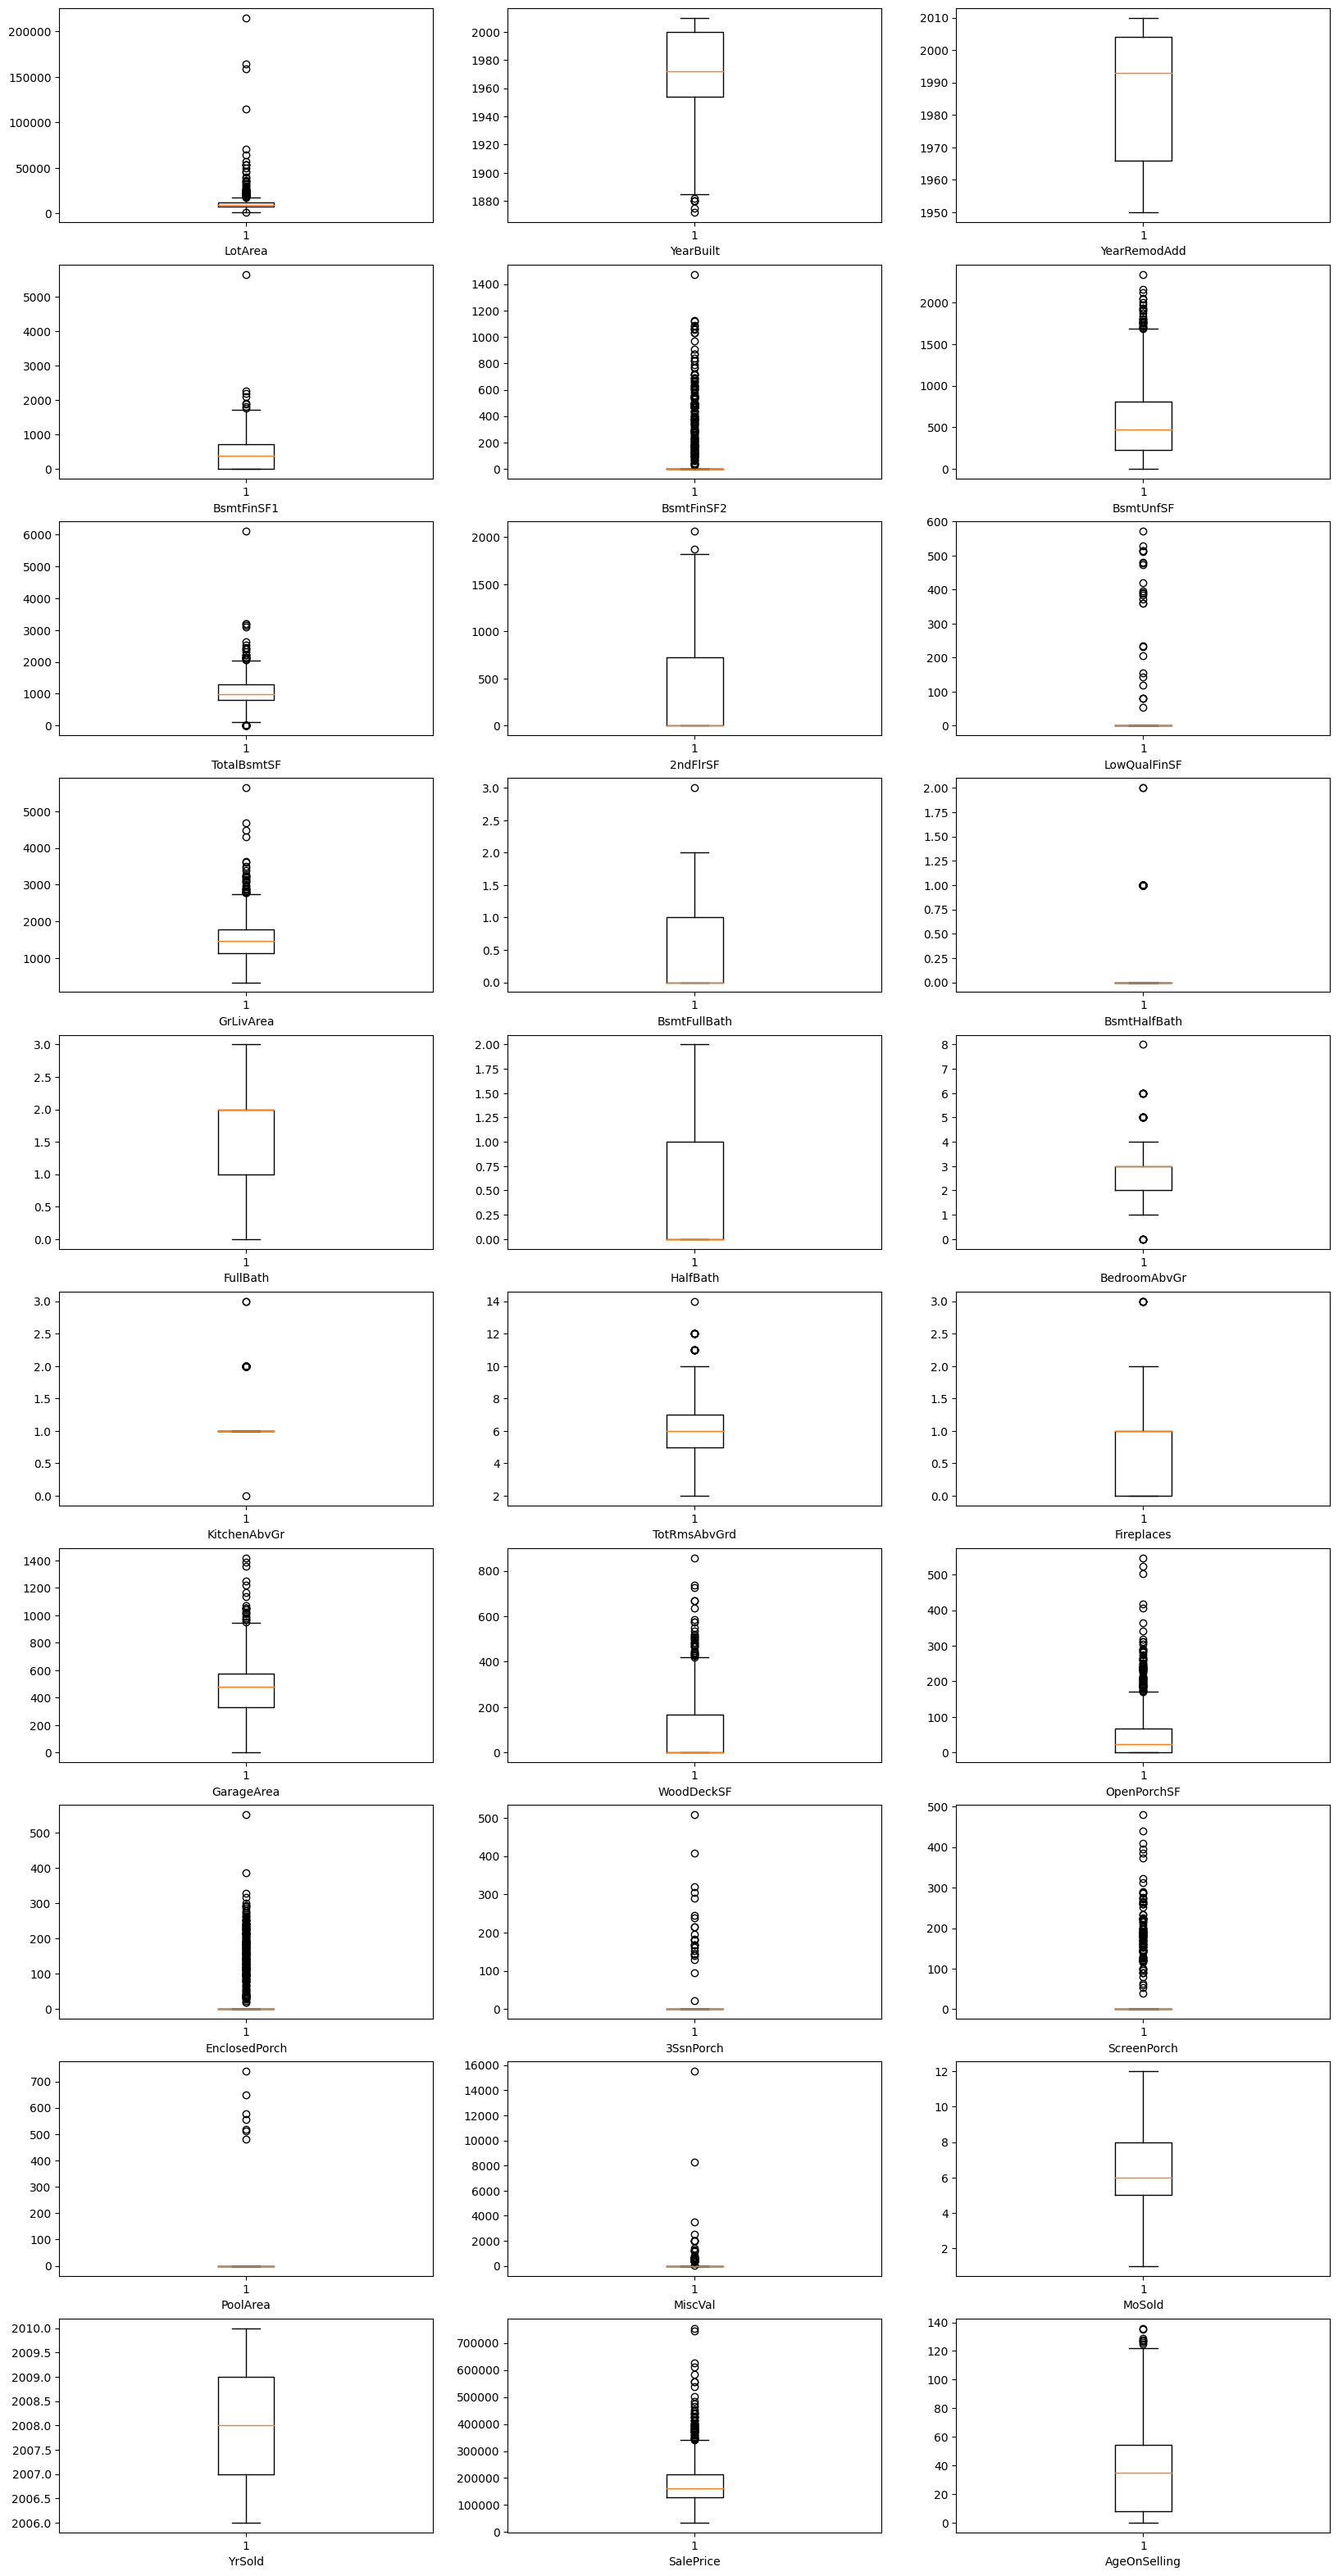

In [52]:
plt.figure(figsize=(20,40))

ax1 = plt.subplot(10,3,1)
plt.boxplot(housing_data['LotArea'])
ax1.set_xlabel('LotArea')

ax1 = plt.subplot(10,3,2)
plt.boxplot(housing_data['YearBuilt'])
ax1.set_xlabel('YearBuilt')

ax1 = plt.subplot(10,3,3)
plt.boxplot(housing_data['YearRemodAdd'])
ax1.set_xlabel('YearRemodAdd')

ax1 = plt.subplot(10,3,4)
plt.boxplot(housing_data['BsmtFinSF1'])
ax1.set_xlabel('BsmtFinSF1')

ax1 = plt.subplot(10,3,5)
plt.boxplot(housing_data['BsmtFinSF2'])
ax1.set_xlabel('BsmtFinSF2')

ax1 = plt.subplot(10,3,6)
plt.boxplot(housing_data['BsmtUnfSF'])
ax1.set_xlabel('BsmtUnfSF')

ax1 = plt.subplot(10,3,7)
plt.boxplot(housing_data['TotalBsmtSF'])
ax1.set_xlabel('TotalBsmtSF')

ax1 = plt.subplot(10,3,8)
plt.boxplot(housing_data['2ndFlrSF'])
ax1.set_xlabel('2ndFlrSF')

ax1 = plt.subplot(10,3,9)
plt.boxplot(housing_data['LowQualFinSF'])
ax1.set_xlabel('LowQualFinSF')

ax1 = plt.subplot(10,3,10)
plt.boxplot(housing_data['GrLivArea'])
ax1.set_xlabel('GrLivArea')

ax1 = plt.subplot(10,3,11)
plt.boxplot(housing_data['BsmtFullBath'])
ax1.set_xlabel('BsmtFullBath')

ax1 = plt.subplot(10,3,12)
plt.boxplot(housing_data['BsmtHalfBath'])
ax1.set_xlabel('BsmtHalfBath')

ax1 = plt.subplot(10,3,13)
plt.boxplot(housing_data['FullBath'])
ax1.set_xlabel('FullBath')

ax1 = plt.subplot(10,3,14)
plt.boxplot(housing_data['HalfBath'])
ax1.set_xlabel('HalfBath')

ax1 = plt.subplot(10,3,15)
plt.boxplot(housing_data['BedroomAbvGr'])
ax1.set_xlabel('BedroomAbvGr')

ax1 = plt.subplot(10,3,16)
plt.boxplot(housing_data['KitchenAbvGr'])
ax1.set_xlabel('KitchenAbvGr')

ax1 = plt.subplot(10,3,17)
plt.boxplot(housing_data['TotRmsAbvGrd'])
ax1.set_xlabel('TotRmsAbvGrd')

ax1 = plt.subplot(10,3,18)
plt.boxplot(housing_data['Fireplaces'])
ax1.set_xlabel('Fireplaces')

ax1 = plt.subplot(10,3,19)
plt.boxplot(housing_data['GarageArea'])
ax1.set_xlabel('GarageArea')

ax1 = plt.subplot(10,3,20)
plt.boxplot(housing_data['WoodDeckSF'])
ax1.set_xlabel('WoodDeckSF')

ax1 = plt.subplot(10,3,21)
plt.boxplot(housing_data['OpenPorchSF'])
ax1.set_xlabel('OpenPorchSF')

ax1 = plt.subplot(10,3,22)
plt.boxplot(housing_data['EnclosedPorch'])
ax1.set_xlabel('EnclosedPorch')

ax1 = plt.subplot(10,3,23)
plt.boxplot(housing_data['3SsnPorch'])
ax1.set_xlabel('3SsnPorch')

ax1 = plt.subplot(10,3,24)
plt.boxplot(housing_data['ScreenPorch'])
ax1.set_xlabel('ScreenPorch')

ax1 = plt.subplot(10,3,25)
plt.boxplot(housing_data['PoolArea'])
ax1.set_xlabel('PoolArea')

ax1 = plt.subplot(10,3,26)
plt.boxplot(housing_data['MiscVal'])
ax1.set_xlabel('MiscVal')

ax1 = plt.subplot(10,3,27)
plt.boxplot(housing_data['MoSold'])
ax1.set_xlabel('MoSold')

ax1 = plt.subplot(10,3,28)
plt.boxplot(housing_data['YrSold'])
ax1.set_xlabel('YrSold')

ax1 = plt.subplot(10,3,29)
plt.boxplot(housing_data['SalePrice'])
ax1.set_xlabel('SalePrice')

ax1 = plt.subplot(10,3,30)
plt.boxplot(housing_data['AgeOnSelling'])
ax1.set_xlabel('AgeOnSelling')

__There are a considerable number of outliers presents in multiple columns, but considering the records in the dataset concluded to leave the outliers as it is, removing the outliers may cause a massive reduction of the records and it may negatively affect the accuracy of the model.__

#### Dropping Id Column

In [53]:
housing_data = housing_data.drop('Id', axis=1)

In [54]:
# Printing data head of processed data frame
housing_data.head()

,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,AgeOnSelling
0,2-STORY 1946 & NEWER,RL,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Good,Average,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003,RFn,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500,5
1,1-STORY 1946 & NEWER ALL STYLES,RL,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Above Average,Very Good,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500,31
2,2-STORY 1946 & NEWER,RL,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Good,Average,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500,7
3,2-STORY 1945 & OLDER,RL,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Good,Average,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000,91
4,2-STORY 1946 & NEWER,RL,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Very Good,Average,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000,8


## Step 6: Data Preparation

After understanding the data with the help of visualization, the next step will be the data preparation for building the model, in order to prepare data we will follow several standard procedures.

#### Converting 'Yes or 'No Type of Columns into 0 and 1

The __CentralAir__ column falls under the category of __'Yes'__ or __'No'__, thereby we need convert it into __0__ and __1__ to  model to process.

In [55]:
# Creating the 'Yes'/'No' mapping function
def yes_no_map(x):
    return x.map({'Y': 0, 'N': 1})

In [56]:
# Performing the CentralAir mapping
housing_data[['CentralAir']] = housing_data[['CentralAir']].apply(yes_no_map)

In [57]:
# Printing data head of processed dataset
housing_data.head()

,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,AgeOnSelling
0,2-STORY 1946 & NEWER,RL,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Good,Average,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,0,SBrkr,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003,RFn,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500,5
1,1-STORY 1946 & NEWER ALL STYLES,RL,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Above Average,Very Good,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,0,SBrkr,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500,31
2,2-STORY 1946 & NEWER,RL,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Good,Average,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,0,SBrkr,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500,7
3,2-STORY 1945 & OLDER,RL,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Good,Average,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,0,SBrkr,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000,91
4,2-STORY 1946 & NEWER,RL,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Very Good,Average,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,0,SBrkr,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000,8


#### Creating Dummy Variables For Nominal Categorical Variables

The creation of dummy variables is another popular technique for converting category values into numerical form, categorical variables with multiple values will be a good candidate for creating dummy variables, hence we will create dummy variables for following nominal categorical variables,

- MSSubClass    
- MSZoning      
- Street        
- Alley              
- LandContour   
- Utilities     
- LotConfig     
- LandSlope     
- Neighborhood  
- Condition1    
- Condition2    
- BldgType      
- HouseStyle      
- RoofStyle     
- RoofMatl      
- Exterior1st   
- Exterior2nd   
- MasVnrType          
- Foundation          
- Heating           
- Electrical     
- Functional       
- GarageType           
- PavedDrive          
- MiscFeature   
- SaleType      
- SaleCondition 
- BsmtFinType1
- BsmtFinType2 
- LotShape
- Fence

In [58]:
# Creating dummy variable for MSSubClass column
MSSubClass_dummy = pd.get_dummies(housing_data['MSSubClass'], drop_first = True)
housing_data = pd.concat([housing_data, MSSubClass_dummy], axis = 1)
housing_data.drop(['MSSubClass'], axis = 1, inplace = True)

In [59]:
# Creating dummy variable for MSZoning column
MSZoning_dummy = pd.get_dummies(housing_data['MSZoning'], drop_first = True)
housing_data = pd.concat([housing_data, MSZoning_dummy], axis = 1)
housing_data.drop(['MSZoning'], axis = 1, inplace = True)

In [60]:
# Creating dummy variable for Street column
Street_dummy = pd.get_dummies(housing_data['Street'], drop_first = True)
housing_data = pd.concat([housing_data, Street_dummy], axis = 1)
housing_data.drop(['Street'], axis = 1, inplace = True)

In [61]:
# Creating dummy variable for Alley column
Alley_dummy = pd.get_dummies(housing_data['Alley'], drop_first = True)
housing_data = pd.concat([housing_data, Alley_dummy], axis = 1)
housing_data.drop(['Alley'], axis = 1, inplace = True)

In [62]:
# Creating dummy variable for LandContour column
LandContour_dummy = pd.get_dummies(housing_data['LandContour'], drop_first = True)
housing_data = pd.concat([housing_data, LandContour_dummy], axis = 1)
housing_data.drop(['LandContour'], axis = 1, inplace = True)

In [63]:
# Creating dummy variable for Utilities column
Utilities_dummy = pd.get_dummies(housing_data['Utilities'], drop_first = True)
housing_data = pd.concat([housing_data, Utilities_dummy], axis = 1)
housing_data.drop(['Utilities'], axis = 1, inplace = True)

In [64]:
# Creating dummy variable for LotConfig column
LotConfig_dummy = pd.get_dummies(housing_data['LotConfig'], drop_first = True)
housing_data = pd.concat([housing_data, LotConfig_dummy], axis = 1)
housing_data.drop(['LotConfig'], axis = 1, inplace = True)

In [65]:
# Creating dummy variable for Neighborhood column
Neighborhood_dummy = pd.get_dummies(housing_data['Neighborhood'], drop_first = True)
housing_data = pd.concat([housing_data, Neighborhood_dummy], axis = 1)
housing_data.drop(['Neighborhood'], axis = 1, inplace = True)

In [66]:
# Creating dummy variable for Condition1 column
Condition1_dummy = pd.get_dummies(housing_data['Condition1'], drop_first = True)
housing_data = pd.concat([housing_data, Condition1_dummy], axis = 1)
housing_data.drop(['Condition1'], axis = 1, inplace = True)

In [67]:
# Creating dummy variable for Condition2 column
Condition2_dummy = pd.get_dummies(housing_data['Condition2'], drop_first = True)
housing_data = pd.concat([housing_data, Condition2_dummy], axis = 1)
housing_data.drop(['Condition2'], axis = 1, inplace = True)

In [68]:
# Creating dummy variable for BldgType column
BldgType_dummy = pd.get_dummies(housing_data['BldgType'], drop_first = True)
housing_data = pd.concat([housing_data, BldgType_dummy], axis = 1)
housing_data.drop(['BldgType'], axis = 1, inplace = True)

In [69]:
# Creating dummy variable for HouseStyle column
HouseStyle_dummy = pd.get_dummies(housing_data['HouseStyle'], drop_first = True)
housing_data = pd.concat([housing_data, HouseStyle_dummy], axis = 1)
housing_data.drop(['HouseStyle'], axis = 1, inplace = True)

In [70]:
# Creating dummy variable for RoofStyle column
RoofStyle_dummy = pd.get_dummies(housing_data['RoofStyle'], drop_first = True)
housing_data = pd.concat([housing_data, RoofStyle_dummy], axis = 1)
housing_data.drop(['RoofStyle'], axis = 1, inplace = True)

In [71]:
# Creating dummy variable for RoofMatl column
RoofMatl_dummy = pd.get_dummies(housing_data['RoofMatl'], drop_first = True)
housing_data = pd.concat([housing_data, RoofMatl_dummy], axis = 1)
housing_data.drop(['RoofMatl'], axis = 1, inplace = True)

In [72]:
# Creating dummy variable for Exterior1st column
Exterior1st_dummy = pd.get_dummies(housing_data['Exterior1st'], drop_first = True)
housing_data = pd.concat([housing_data, Exterior1st_dummy], axis = 1)
housing_data.drop(['Exterior1st'], axis = 1, inplace = True)

In [73]:
# Creating dummy variable for Exterior2nd column
Exterior2nd_dummy = pd.get_dummies(housing_data['Exterior2nd'], drop_first = True)
housing_data = pd.concat([housing_data, Exterior2nd_dummy], axis = 1)
housing_data.drop(['Exterior2nd'], axis = 1, inplace = True)

In [74]:
# Creating dummy variable for MasVnrType column
MasVnrType_dummy = pd.get_dummies(housing_data['MasVnrType'], drop_first = True)
housing_data = pd.concat([housing_data, MasVnrType_dummy], axis = 1)
housing_data.drop(['MasVnrType'], axis = 1, inplace = True)

In [75]:
# Creating dummy variable for Foundation column
Foundation_dummy = pd.get_dummies(housing_data['Foundation'], drop_first = True)
housing_data = pd.concat([housing_data, Foundation_dummy], axis = 1)
housing_data.drop(['Foundation'], axis = 1, inplace = True)

In [76]:
# Creating dummy variable for Heating column
Heating_dummy = pd.get_dummies(housing_data['Heating'], drop_first = True)
housing_data = pd.concat([housing_data, Heating_dummy], axis = 1)
housing_data.drop(['Heating'], axis = 1, inplace = True)

In [77]:
# Creating dummy variable for Electrical column
Electrical_dummy = pd.get_dummies(housing_data['Electrical'], drop_first = True)
housing_data = pd.concat([housing_data, Electrical_dummy], axis = 1)
housing_data.drop(['Electrical'], axis = 1, inplace = True)

In [78]:
# Creating dummy variable for Functional column
Functional_dummy = pd.get_dummies(housing_data['Functional'], drop_first = True)
housing_data = pd.concat([housing_data, Functional_dummy], axis = 1)
housing_data.drop(['Functional'], axis = 1, inplace = True)

In [79]:
# Creating dummy variable for GarageType column
GarageType_dummy = pd.get_dummies(housing_data['GarageType'], drop_first = True)
housing_data = pd.concat([housing_data, GarageType_dummy], axis = 1)
housing_data.drop(['GarageType'], axis = 1, inplace = True)

In [80]:
# Creating dummy variable for PavedDrive column
PavedDrive_dummy = pd.get_dummies(housing_data['PavedDrive'], drop_first = True)
housing_data = pd.concat([housing_data, PavedDrive_dummy], axis = 1)
housing_data.drop(['PavedDrive'], axis = 1, inplace = True)

In [81]:
# Creating dummy variable for MiscFeature column
MiscFeature_dummy = pd.get_dummies(housing_data['MiscFeature'], drop_first = True)
housing_data = pd.concat([housing_data, MiscFeature_dummy], axis = 1)
housing_data.drop(['MiscFeature'], axis = 1, inplace = True)

In [82]:
# Creating dummy variable for SaleType column
SaleType_dummy = pd.get_dummies(housing_data['SaleType'], drop_first = True)
housing_data = pd.concat([housing_data, SaleType_dummy], axis = 1)
housing_data.drop(['SaleType'], axis = 1, inplace = True)

In [83]:
# Creating dummy variable for SaleCondition column
SaleCondition_dummy = pd.get_dummies(housing_data['SaleCondition'], drop_first = True)
housing_data = pd.concat([housing_data, SaleCondition_dummy], axis = 1)
housing_data.drop(['SaleCondition'], axis = 1, inplace = True)

In [84]:
# Creating dummy variable for BsmtFinType1 column
BsmtFinType1_dummy = pd.get_dummies(housing_data['BsmtFinType1'], drop_first = True)
housing_data = pd.concat([housing_data, BsmtFinType1_dummy], axis = 1)
housing_data.drop(['BsmtFinType1'], axis = 1, inplace = True)

In [85]:
# Creating dummy variable for BsmtFinType2 column
BsmtFinType2_dummy = pd.get_dummies(housing_data['BsmtFinType2'], drop_first = True)
housing_data = pd.concat([housing_data, BsmtFinType2_dummy], axis = 1)
housing_data.drop(['BsmtFinType2'], axis = 1, inplace = True)

In [86]:
# Creating dummy variable for LotShape column
LotShape_dummy = pd.get_dummies(housing_data['LotShape'], drop_first = True)
housing_data = pd.concat([housing_data, LotShape_dummy], axis = 1)
housing_data.drop(['LotShape'], axis = 1, inplace = True)

In [87]:
# Creating dummy variable for Fence column
Fence_dummy = pd.get_dummies(housing_data['Fence'], drop_first = True)
housing_data = pd.concat([housing_data, Fence_dummy], axis = 1)
housing_data.drop(['Fence'], axis = 1, inplace = True)

In [88]:
# Creating dummy variable for LandSlope column
LandSlope_dummy = pd.get_dummies(housing_data['LandSlope'], drop_first = True)
housing_data = pd.concat([housing_data, LandSlope_dummy], axis = 1)
housing_data.drop(['LandSlope'], axis = 1, inplace = True)

In [89]:
# After adding the dummy variables checking the shape of housing_data
housing_data.shape

(1452, 237)

After dummy variables, the dataset contains,<br>
__Rows__ : __1452__ <br>
__Columns__ : __237__

#### Creating Dummy Variables For Ordinal Categorical Variables

To handle the ordinal categorical variables we need to create proper mappings, mappings will be created for the following ordinal categorical variables,

- OverallQual 
- OverallCond
- ExterQual     
- ExterCond 
- BsmtQual      
- BsmtCond  
- BsmtExposure 
- HeatingQC 
- KitchenQual
- FireplaceQu
- GarageQual    
- GarageCond 
- PoolQC
- GarageFinish

In [90]:
# Creating the map function for OverallQual & OverallCond
def overall_map(x):
    return x.map({'Very Poor': 1, 'Poor': 2, 'Fair': 3, 'Below Average': 4, 'Average' : 5, 'Above Average' : 6, 
                  'Good' : 7, 'Very Good' : 8, 'Excellent' : 9, 'Very Excellent' : 10})

In [91]:
# Mapping OverallQual
housing_data[['OverallQual']]=housing_data[['OverallQual']].apply(overall_map)

In [92]:
# Mapping OverallCond
housing_data[['OverallCond']]=housing_data[['OverallCond']].apply(overall_map)

In [93]:
# Creating the map function for ExterQual, ExterCond, HeatingQC & KitchenQual  
def exter_map(x):
    return x.map({'Po' : 1, 'Fa' : 2, 'TA' :3, 'Gd' : 4, 'Ex' : 5})

In [94]:
# Mapping ExterQual
housing_data[['ExterQual']]=housing_data[['ExterQual']].apply(exter_map)

In [95]:
# Mapping ExterCond
housing_data[['ExterCond']]=housing_data[['ExterCond']].apply(exter_map)

In [96]:
# Creating the map function for BsmtQual, BsmtCond, GarageQual, GarageCond & FireplaceQu 
def bsmt_map(x):
    return x.map({'None': 0, 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5})

In [97]:
# Mapping BsmtQual
housing_data[['BsmtQual']]=housing_data[['BsmtQual']].apply(bsmt_map)

In [98]:
# Mapping BsmtCond
housing_data[['BsmtCond']]=housing_data[['BsmtCond']].apply(bsmt_map)

In [99]:
# Creating the map function for BsmtExposure
def bsmt_exposure_map(x):
    return x.map({'None': 0, 'No' : 1, 'Mn' : 2, 'Av' : 3, 'Gd' : 4})

In [100]:
# Mapping BsmtExposure
housing_data[['BsmtExposure']]=housing_data[['BsmtExposure']].apply(bsmt_exposure_map)

In [101]:
# Mapping HeatingQC 
housing_data[['HeatingQC']]=housing_data[['HeatingQC']].apply(exter_map)

In [102]:
# Mapping KitchenQual 
housing_data[['KitchenQual']]=housing_data[['KitchenQual']].apply(exter_map)

In [103]:
# Mapping FireplaceQu 
housing_data[['FireplaceQu']]=housing_data[['FireplaceQu']].apply(bsmt_map)

In [104]:
# Mapping GarageQual 
housing_data[['GarageQual']]=housing_data[['GarageQual']].apply(bsmt_map)

In [105]:
# Mapping GarageCond  
housing_data[['GarageCond']]=housing_data[['GarageCond']].apply(bsmt_map)

In [106]:
# Creating the map function for PoolQC
def pool_map(x):
    return x.map({'None': 0, 'Fa' : 1, 'TA' : 2, 'Gd' : 3, 'Ex' : 4})

In [107]:
# Mapping PoolQC  
housing_data[['PoolQC']]=housing_data[['PoolQC']].apply(pool_map)

In [108]:
# Creating the map function for GarageFinish
def garage_finish_map(x):
    return x.map({'None': 0, 'Unf' : 1, 'RFn' : 2, 'Fin' : 3})

In [109]:
# Mapping GarageFinish  
housing_data[['GarageFinish']]=housing_data[['GarageFinish']].apply(garage_finish_map)

In [110]:
# Printing data head of processed data frame
housing_data.head()

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,SalePrice,AgeOnSelling,1-STORY 1945 & OLDER,1-STORY 1946 & NEWER ALL STYLES,1-STORY PUD (Planned Unit Development) - 1946 & NEWER,1-STORY W/FINISHED ATTIC ALL AGES,1/2 STORY FINISHED ALL AGES,2 FAMILY CONVERSION - ALL STYLES AND AGES,2-1/2 STORY ALL AGES,2-STORY 1945 & OLDER,2-STORY 1946 & NEWER,2-STORY PUD - 1946 & NEWER,DUPLEX - ALL STYLES AND AGES,PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,SPLIT FOYER,SPLIT OR MULTI-LEVEL,FV,RH,RL,RM,Pave,None,Pave,HLS,Low,Lvl,NoSeWa,CulDSac,FR2,FR3,Inside,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNe,RRNn,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNn,2fmCon,Duplex,Twnhs,TwnhsE,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl,Gable,Gambrel,Hip,Mansard,Shed,CompShg,Membran,Metal,Roll,Tar&Grv,WdShake,WdShngl,AsphShn,BrkComm,BrkFace,CBlock,CemntBd,HdBoard,ImStucc,MetalSd,Plywood,Stone,Stucco,VinylSd,Wd Sdng,WdShing,AsphShn,Brk Cmn,BrkFace,CBlock,CmentBd,HdBoard,ImStucc,MetalSd,Other,Plywood,Stone,Stucco,VinylSd,Wd Sdng,Wd Shng,BrkFace,None,Stone,CBlock,PConc,Slab,Stone,Wood,GasA,GasW,Grav,OthW,Wall,FuseF,FuseP,Mix,NA,SBrkr,Maj2,Min1,Min2,Mod,Sev,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,None,P,Y,None,Othr,Shed,TenC,CWD,Con,ConLD,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial,BLQ,GLQ,LwQ,None,Rec,Unf,BLQ,GLQ,LwQ,None,Rec,Unf,IR2,IR3,Reg,GdWo,MnPrv,MnWw,None,Mod,Sev
0,8450,7,5,2003,2003,196,4,3,4,3,1,706,0,150,856,5,0,854,0,1710,1,0,2,1,3,1,4,8,0,0,2003,2,548,3,3,0,61,0,0,0,0,0,0,2,2008,208500,5,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,True,True,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False
1,9600,6,8,1976,1976,0,3,3,4,3,4,978,0,284,1262,5,0,0,0,1262,0,1,2,0,3,1,3,6,1,3,1976,2,460,3,3,298,0,0,0,0,0,0,0,5,2007,181500,31,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,

## Step 7: Splitting the Data into Training, Testing Sets and Scaling

After preparation of the data for model building, the important step is to split the dataset into train and test sets, with the training dataset we will train the model to understand the data and with the test data set we will test the model to evaluate how well model had understood the data with the training data set.

In [111]:
# importing required libraries
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

In [112]:
# Split into X and y
X = housing_data.drop('SalePrice', axis=1) 
y = housing_data['SalePrice']

In [113]:
# Perform scaling on dependent variables
columns = X.columns
X = pd.DataFrame(scale(X))
X.columns = columns

In [114]:
# Printing data head of processed X Dataset
X.head()

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,AgeOnSelling,1-STORY 1945 & OLDER,1-STORY 1946 & NEWER ALL STYLES,1-STORY PUD (Planned Unit Development) - 1946 & NEWER,1-STORY W/FINISHED ATTIC ALL AGES,1/2 STORY FINISHED ALL AGES,2 FAMILY CONVERSION - ALL STYLES AND AGES,2-1/2 STORY ALL AGES,2-STORY 1945 & OLDER,2-STORY 1946 & NEWER,2-STORY PUD - 1946 & NEWER,DUPLEX - ALL STYLES AND AGES,PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,SPLIT FOYER,SPLIT OR MULTI-LEVEL,FV,RH,RL,RM,Pave,None,Pave,HLS,Low,Lvl,NoSeWa,CulDSac,FR2,FR3,Inside,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNe,RRNn,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNn,2fmCon,Duplex,Twnhs,TwnhsE,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl,Gable,Gambrel,Hip,Mansard,Shed,CompShg,Membran,Metal,Roll,Tar&Grv,WdShake,WdShngl,AsphShn,BrkComm,BrkFace,CBlock,CemntBd,HdBoard,ImStucc,MetalSd,Plywood,Stone,Stucco,VinylSd,Wd Sdng,WdShing,AsphShn,Brk Cmn,BrkFace,CBlock,CmentBd,HdBoard,ImStucc,MetalSd,Other,Plywood,Stone,Stucco,VinylSd,Wd Sdng,Wd Shng,BrkFace,None,Stone,CBlock,PConc,Slab,Stone,Wood,GasA,GasW,Grav,OthW,Wall,FuseF,FuseP,Mix,NA,SBrkr,Maj2,Min1,Min2,Mod,Sev,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,None,P,Y,None,Othr,Shed,TenC,CWD,Con,ConLD,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial,BLQ,GLQ,LwQ,None,Rec,Unf,BLQ,GLQ,LwQ,None,Rec,Unf,IR2,IR3,Reg,GdWo,MnPrv,MnWw,None,Mod,Sev
0,-0.206014,0.656877,-0.520512,1.056331,0.882742,0.510015,1.062094,-0.238805,0.585845,0.119610,-0.591745,0.580026,-0.289513,-0.943747,-0.456305,0.894346,-0.264589,1.162384,-0.120577,0.372842,1.111536,-0.241763,0.795081,1.230784,0.163186,-0.210294,0.740279,0.912198,-0.951895,-1.008492,1.012642,0.323396,0.352866,0.263314,0.266401,-0.753221,0.221269,-0.359223,-0.116664,-0.271006,-0.068882,-0.063972,-0.087931,-1.600089,0.138937,-1.048535,-0.223364,-0.760435,-0.250913,-0.052559,-0.331801,-0.145248,-0.105556,-0.207614,1.976210,-0.21297,-0.192725,-0.083276,-0.11818,-0.203978,-0.211197,-0.105556,0.516736,-0.420311,0.064416,0.257059,-0.168311,-0.188847,-0.159448,0.338159,-0.026252,-0.261596,-0.182899,-0.052559,0.623013,-0.037139,-0.105556,-0.203978,-0.140225,2.957189,-0.188847,-0.271964,-0.238262,-0.161705,-0.108843,-0.186883,-0.428222,-0.078975,-0.23008,-0.170462,-0.235016,-0.290502,-0.13236,-0.231735,-0.203978,-0.246228,-0.13236,-0.163933,-0.087370,-0.243066,0.399680,-0.074432,-0.115147,-0.08737,-0.135029,-0.037139,-0.058783,-0.064416,0.102169,-0.026252,-0.037139,-0.026252,-0.026252,-0.037139,-0.147701,-0.192725,-0.174694,-0.290502,-0.09867,-0.993137,-0.074432,-0.08737,1.511644,-0.161705,-0.21648,0.52955,-0.08737,-0.494182,-0.069601,-0.037139,0.135029,-0.026252,-0.026252,-0.026252,-0.08737,-0.058783,-0.064416,-0.026252,-0.037139,-0.188847,-0.026252,-0.205802,-0.424839,-0.026252,-0.422577,-0.283473,-0.037139,-0.13236,1.359065,-0.405456,-0.135029,-0.045502,-0.069601,-0.13236,-0.026252,-0.203978,-0.407756,-0.083276,-0.415764,-0.026252,-0.329237,-0.052559,-0.135029,1.381962,-0.396197,-0.163933,1.504301,-1.212183,-0.310929,-0.880376,1.127963,-0.129641,-0.064416,-0.045502,0.150117,-0.112037,-0.069601,-0.037139,-0.052559,-0.137649,-0.045502,-0.026252,-0.026252,0.308257,-0.058783,-0.147701,-0.154846,-0.102169,-0.026252,0.270501,0.826137,-0.115147,-0.25246,-0.078975,-0.602810,-0.243066,-0.145248,0.30015,0.196537,-0.037139,-0.186883,-0.026252,-0.052559,-0.037139,-0.078975,-0.058783,-0.058783,-0.298785,-0.045502,0.

In [115]:
# Printing data head of processed X Dataset
X.describe()

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,AgeOnSelling,1-STORY 1945 & OLDER,1-STORY 1946 & NEWER ALL STYLES,1-STORY PUD (Planned Unit Development) - 1946 & NEWER,1-STORY W/FINISHED ATTIC ALL AGES,1/2 STORY FINISHED ALL AGES,2 FAMILY CONVERSION - ALL STYLES AND AGES,2-1/2 STORY ALL AGES,2-STORY 1945 & OLDER,2-STORY 1946 & NEWER,2-STORY PUD - 1946 & NEWER,DUPLEX - ALL STYLES AND AGES,PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,SPLIT FOYER,SPLIT OR MULTI-LEVEL,FV,RH,RL,RM,Pave,None,Pave,HLS,Low,Lvl,NoSeWa,CulDSac,FR2,FR3,Inside,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNe,RRNn,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNn,2fmCon,Duplex,Twnhs,TwnhsE,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl,Gable,Gambrel,Hip,Mansard,Shed,CompShg,Membran,Metal,Roll,Tar&Grv,WdShake,WdShngl,AsphShn,BrkComm,BrkFace,CBlock,CemntBd,HdBoard,ImStucc,MetalSd,Plywood,Stone,Stucco,VinylSd,Wd Sdng,WdShing,AsphShn,Brk Cmn,BrkFace,CBlock,CmentBd,HdBoard,ImStucc,MetalSd,Other,Plywood,Stone,Stucco,VinylSd,Wd Sdng,Wd Shng,BrkFace,None,Stone,CBlock,PConc,Slab,Stone,Wood,GasA,GasW,Grav,OthW,Wall,FuseF,FuseP,Mix,NA,SBrkr,Maj2,Min1,Min2,Mod,Sev,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,None,P,Y,None,Othr,Shed,TenC,CWD,Con,ConLD,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial,BLQ,GLQ,LwQ,None,Rec,Unf,BLQ,GLQ,LwQ,None,Rec,Unf,IR2,IR3,Reg,GdWo,MnPrv,MnWw,None,Mod,Sev
count,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1452.000000,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1452.000000,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1452.000000,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1452.000000,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1452.000000,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.4

In [116]:
# Split into train and test datasets ratio of 70% and 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=100)

## Step 8: Feature Selection

In this section we will select the Optimal Features by Performing __RFE(Recursive Feature Elimination)__ technique

In [117]:
# Importing RFE and LinearRegression libraries
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [118]:
# Building the Linear Regression model and fitting the data into it
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [119]:
# Running RFE expecting count of 10 possible outputs 
rfe = RFE(model, step=10)             
rfe = rfe.fit(X_train, y_train)

In [120]:
# Analyzing the RFE results 
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', False, 9),
 ('MasVnrArea', True, 1),
 ('ExterQual', True, 1),
 ('ExterCond', False, 2),
 ('BsmtQual', True, 1),
 ('BsmtCond', False, 11),
 ('BsmtExposure', True, 1),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('HeatingQC', False, 5),
 ('CentralAir', False, 13),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 3),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', True, 1),
 ('BsmtHalfBath', False, 7),
 ('FullBath', False, 6),
 ('HalfBath', True, 1),
 ('BedroomAbvGr', True, 1),
 ('KitchenAbvGr', True, 1),
 ('KitchenQual', True, 1),
 ('TotRmsAbvGrd', True, 1),
 ('Fireplaces', True, 1),
 ('FireplaceQu', True, 1),
 ('GarageYrBlt', True, 1),
 ('GarageFinish', False, 12),
 ('GarageArea', True, 1),
 ('GarageQual', True, 1),
 ('GarageCond', True, 1),
 ('WoodDeckSF', False, 3),
 ('OpenPorchSF', False, 8),
 ('EnclosedPorch',

In [121]:
# Extracting the RFE supportted columns 
rfe_support_col = X_train.columns[rfe.support_]

In [122]:
# Filtering the train set with RFE supported columns
X_train_rfe = X_train[rfe_support_col]

In [123]:
# Creating function to build the model and print OLS statistics
def build_model():
    # Adding the rfe supported columns
    X_train_lm = sm.add_constant(X_train_rfe)
    # Fitting the model
    lr_model = sm.OLS(y_train.values.reshape(-1,1), X_train_lm).fit()
    # printing the model summary
    return lr_model

In [124]:
print(build_model().summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     93.04
Date:                Tue, 23 May 2023   Prob (F-statistic):               0.00
Time:                        07:59:03   Log-Likelihood:                -11545.
No. Observations:                1016   AIC:                         2.334e+04
Df Residuals:                     891   BIC:                         2.395e+04
Df Model:                         124                                         
Covariance Type:            nonrobust                                         
                                                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

In [125]:
# Creating a DataFame to fit the RFE supported columns
def calculate_vif():
    vif = pd.DataFrame()
    vif['Features'] = X_train_rfe.columns
    vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)
# Calculating the V

In [126]:
# Calculating the VIF
calculate_vif()

                                              Features    VIF
139                                               Othr    inf
165                                               None    inf
79                                             WdShake    inf
78                                             Tar&Grv    inf
77                                                Roll    inf
76                                               Metal    inf
153                                               None    inf
74                                             CompShg    inf
73                                                Shed    inf
72                                                Shed    inf
140                                               Shed    inf
141                                               Shed    inf
154                                               None    inf
66                                              Duplex    inf
155                                               None    inf
156     

According to the above VIF analysis, removed all the features having high VIF values

In [127]:
# Removed all the features which having high VIF
X_train_rfe.drop(['None'], axis = 1, inplace = True)
X_train_rfe.drop(['Shed'], axis = 1, inplace = True)
X_train_rfe.drop(['CBlock'], axis = 1, inplace = True)
X_train_rfe.drop(['BrkFace'], axis = 1, inplace = True)
X_train_rfe.drop(['Norm'], axis = 1, inplace = True)
X_train_rfe.drop(['Duplex'], axis = 1, inplace = True)
X_train_rfe.drop(['CompShg'], axis = 1, inplace = True)
X_train_rfe.drop(['Metal'], axis = 1, inplace = True)
X_train_rfe.drop(['Roll'], axis = 1, inplace = True)
X_train_rfe.drop(['Tar&Grv'], axis = 1, inplace = True)
X_train_rfe.drop(['WdShake'], axis = 1, inplace = True)
X_train_rfe.drop(['WdShngl'], axis = 1, inplace = True)
X_train_rfe.drop(['Unf'], axis = 1, inplace = True)
X_train_rfe.drop(['BsmtFinSF2'], axis = 1, inplace = True)
X_train_rfe.drop(['BsmtUnfSF'], axis = 1, inplace = True)
X_train_rfe.drop(['TotalBsmtSF'], axis = 1, inplace = True)
X_train_rfe.drop(['BsmtFinSF1'], axis = 1, inplace = True)
X_train_rfe.drop(['SLvl'], axis = 1, inplace = True)
X_train_rfe.drop(['SPLIT OR MULTI-LEVEL'], axis = 1, inplace = True)
X_train_rfe.drop(['2ndFlrSF'], axis = 1, inplace = True)
X_train_rfe.drop(['GasA'], axis = 1, inplace = True)
X_train_rfe.drop(['2-1/2 STORY ALL AGES'], axis = 1, inplace = True)
X_train_rfe.drop(['GasW'], axis = 1, inplace = True)
X_train_rfe.drop(['YearBuilt'], axis = 1, inplace = True)
X_train_rfe.drop(['YrSold'], axis = 1, inplace = True)
X_train_rfe.drop(['Partial'], axis = 1, inplace = True)
X_train_rfe.drop(['New'], axis = 1, inplace = True)
X_train_rfe.drop(['RL'], axis = 1, inplace = True)
X_train_rfe.drop(['1-STORY 1946 & NEWER ALL STYLES'], axis = 1, inplace = True)
X_train_rfe.drop(['CmentBd'], axis = 1, inplace = True)
X_train_rfe.drop(['GarageQual'], axis = 1, inplace = True)
X_train_rfe.drop(['GrLivArea'], axis = 1, inplace = True)
X_train_rfe.drop(['AgeOnSelling'], axis = 1, inplace = True)

In [128]:
# Removing duplicated values 
X_train_rfe = X_train_rfe.loc[:,~X_train_rfe.columns.duplicated()].copy()
X_test = X_test[list(X_train_rfe.columns)]
X_test_rfe = X_test.loc[:,~X_test.columns.duplicated()].copy()
X = X[list(X_train_rfe.columns)]
X = X.loc[:,~X.columns.duplicated()].copy()

In [129]:
# Re-building the model
print(build_model().summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     88.71
Date:                Tue, 23 May 2023   Prob (F-statistic):               0.00
Time:                        07:59:07   Log-Likelihood:                -11848.
No. Observations:                1016   AIC:                         2.384e+04
Df Residuals:                     944   BIC:                         2.419e+04
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
                                                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

In [130]:
# Re-calculating the VIF values
calculate_vif()

                                             Features   VIF
14                                        FireplaceQu  5.35
26                               2-STORY 1946 & NEWER  5.05
13                                         Fireplaces  5.05
46                                             1Story  5.01
62                                                Typ  4.80
12                                       TotRmsAbvGrd  4.29
1                                         OverallQual  4.06
15                                        GarageYrBlt  3.86
49                                             SFoyer  3.53
10                                       KitchenAbvGr  3.39
28                       DUPLEX - ALL STYLES AND AGES  3.22
4                                           ExterQual  3.14
61                                               Min2  3.12
16                                         GarageArea  2.98
9                                        BedroomAbvGr  2.88
23                        1/2 STORY FINI

## Step 9: Model Building

After preparation of Train and Test data, the next step will be building the prediction model, to optimize the accuracy of the results we're going to build the model using following 3 techniques and evaluate best outcome.
- Linear Regression
- Ridge Regression
- Lasso Regression

In [131]:
# Loading the required libraries
from sklearn import linear_model, metrics
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

### Linear Regression

Under this technique we're going to build a linear model to predict the price of houses.

In [132]:
# Creating LM object
lm = LinearRegression()

In [133]:
# Fit the train datasets
lm.fit(X_train_rfe, y_train)

LinearRegression()

In [134]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

1566746279120120.8
[ 5.72588325e+03  1.71472805e+04  5.53730786e+03  5.73458578e+03
  5.05853587e+03  6.52449242e+03  7.15030467e+03  4.18479489e+03
  5.75658991e+03 -4.69128724e+03 -2.29897162e+03  5.23085570e+03
  1.97558789e+04  1.07487238e+04 -5.44994214e+03  2.44199583e+03
  8.44771166e+03 -2.23547827e+03  9.16723559e+03 -4.62950592e+02
 -5.33190038e+03 -5.86075835e+03 -7.84731638e+02  2.39764723e+03
 -9.86382492e+02 -6.20415730e+02  3.91643607e+03 -3.44416735e+03
 -5.42381801e+02 -8.96451714e+02  1.46410284e+02  3.61561843e+03
  4.70076612e+02 -1.61260547e+03 -1.28566234e+03  3.22754493e+03
  2.81912443e+03 -1.79135595e+03  5.93662869e+03 -1.64791687e+03
 -1.45384447e+03  1.01431514e+04  9.32721634e+03  7.67566343e+03
 -6.96211412e+02 -1.28843607e+03  1.19181203e+04  4.64557331e+02
  2.78082974e+02 -1.87074742e+03  6.87847921e+16 -8.33676347e+15
  1.45390226e+03 -3.30294924e+03 -7.67538889e+14  7.74417413e+01
  2.52361610e+02 -1.62146194e+03 -3.27100075e+02  1.10120783e+03
  6.21

In [135]:
# Calculating the R-Squre, RSS & MSE
y_pred_train = lm.predict(X_train_rfe)
y_pred_test = lm.predict(X_test_rfe)

linear_metric = []
r2_train_linear = r2_score(y_train, y_pred_train)
linear_metric.append(r2_train_linear)

r2_test_linear = r2_score(y_test, y_pred_test)
linear_metric.append(r2_test_linear)

rss1_linear = np.sum(np.square(y_train - y_pred_train))
linear_metric.append(rss1_linear)

rss2_linear = np.sum(np.square(y_test - y_pred_test))
linear_metric.append(rss2_linear)

mse_train_linear = mean_squared_error(y_train, y_pred_train)
linear_metric.append(mse_train_linear**0.5)

mse_test_linear = mean_squared_error(y_test, y_pred_test)
linear_metric.append(mse_test_linear**0.5)

### Ridge Regression

Under this technique we're going to build a ridge regression to predict the price of houses.

In [136]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 5.0, 10.0]}

ridge = Ridge()

folds = 5
model_ridge = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1) 

model_ridge.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 5.0,
                                   10.0]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [137]:
# The Best hyperparameter alpha
print(model_ridge.best_params_)

{'alpha': 10.0}


In [138]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 10
ridge = Ridge(alpha=alpha)
ridge.fit(X_train_rfe, y_train)

Ridge(alpha=10)

In [139]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = ridge.predict(X_train_rfe)
y_pred_test = ridge.predict(X_test_rfe)

metric_ridge= []
r2_train_ridge = r2_score(y_train, y_pred_train)
metric_ridge.append(r2_train_ridge)

r2_test_ridge = r2_score(y_test, y_pred_test)
metric_ridge.append(r2_test_ridge)

rss1_ridge = np.sum(np.square(y_train - y_pred_train))
metric_ridge.append(rss1_ridge)

rss2_ridge = np.sum(np.square(y_test - y_pred_test))
metric_ridge.append(rss2_ridge)

mse_train_ridge = mean_squared_error(y_train, y_pred_train)
metric_ridge.append(mse_train_ridge**0.5)

mse_test_ridge = mean_squared_error(y_test, y_pred_test)
metric_ridge.append(mse_test_ridge**0.5)

## Lasso Regression

Under this technique we're going to build a lasso regression to predict the price of houses.

In [140]:
lasso = Lasso()

# cross validation
model_lasso = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_lasso.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 5.0,
                                   10.0]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [141]:
# The best hyperparameter alpha
print(model_lasso.best_params_)

{'alpha': 10.0}


In [142]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 10
lasso = Lasso(alpha=alpha)  
lasso.fit(X_train_rfe, y_train)

Lasso(alpha=10)

In [143]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train_rfe)
y_pred_test = lasso.predict(X_test_rfe)

metric_lasso = []
r2_train_lasso = r2_score(y_train, y_pred_train)
metric_lasso.append(r2_train_lasso)

r2_test_lasso = r2_score(y_test, y_pred_test)
metric_lasso.append(r2_test_lasso)

rss1_lasso = np.sum(np.square(y_train - y_pred_train))
metric_lasso.append(rss1_lasso)

rss2_lasso = np.sum(np.square(y_test - y_pred_test))
metric_lasso.append(rss2_lasso)

mse_train_lasso = mean_squared_error(y_train, y_pred_train)
metric_lasso.append(mse_train_lasso**0.5)

mse_test_lasso = mean_squared_error(y_test, y_pred_test)
metric_lasso.append(mse_test_lasso**0.5)

In [144]:
# Aggregating Linear, Ridge & Lasso metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'],'Linear Regression': linear_metric }

linear_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )
ridge_metric = pd.Series(metric_ridge, name = ' Ridge &  Regression')
lasso_metric = pd.Series(metric_lasso, name = 'Lasso Regression')

aggregated_metric = pd.concat([linear_metric, ridge_metric, lasso_metric], axis = 1)

aggregated_metric

,Metric,Linear Regression,Ridge & Regression,Lasso Regression
0,R2 Score (Train),8.696626e-01,8.695895e-01,8.696603e-01
1,R2 Score (Test),-2.344942e+24,7.527438e-01,7.510694e-01
2,RSS (Train),8.009265e+11,8.013758e+11,8.009407e+11
3,RSS (Test),6.976493e+36,7.356180e+11,7.405994e+11
4,MSE (Train),2.807692e+04,2.808479e+04,2.807717e+04
5,MSE (Test),1.264956e+17,4.107551e+04,4.121435e+04


## Step 10: Conclusion - Top 10 Feature Variable Affecting the House Price

In [145]:
# Creating aggregate coefficient grid
coefficient_grid = pd.DataFrame(index=X.columns)

In [146]:
coefficient_grid.rows = X.columns

In [147]:
coefficient_grid['Linear'] = lm.coef_
coefficient_grid['Ridge'] = ridge.coef_
coefficient_grid['Lasso'] = lasso.coef_

In [148]:
coefficient_grid.head(20).sort_values(by=['Ridge'], ascending=[False])

,Linear,Ridge,Lasso
TotRmsAbvGrd,19755.878920,19077.374349,19721.241741
OverallQual,17147.280535,16895.487094,17152.636069
Fireplaces,10748.723825,10136.726871,10662.819512
PoolQC,9167.235589,9045.888732,9145.874086
GarageArea,8447.711655,8455.145297,8440.131333
BsmtExposure,7150.304667,7101.278392,7149.639388
BsmtQual,6524.492421,6484.283319,6499.385059
MasVnrArea,5734.585782,5822.735066,5735.030213
LotArea,5725.883248,5764.479268,5722.916158
HalfBath,5756.589905,5669.294278,5736.386958


### According to the Above Analysis Top 10 Feature Variable Affecting the House Price
- __TotRmsAbvGrd__
- __OverallQual__ 	
- __Fireplaces__ 	
- __PoolQC__
- __GarageArea__
- __BsmtExposure__
- __BsmtQual__
- __LotArea__
- __MasVnrArea__
- __OverallCond__